In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

# Load some data

In [2]:
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/election/county_election_data_2000-2016.csv'
election_df = pd.read_csv(url,dtype={'FIPS':str})
election_df.head()

,FIPS,gop_2000_votes,dem_2000_votes,totalvotes_2000,gop_2000_prc,dem_2000_prc,gop_minus_dem_prc_2000,gop_2004_votes,dem_2004_votes,totalvotes_2004,...,totalvotes_2012,gop_2012_prc,dem_2012_prc,gop_minus_dem_prc_2012,gop_2016_votes,dem_2016_votes,totalvotes_2016,gop_2016_prc,dem_2016_prc,gop_minus_dem_prc_2016
0,01001,11993.0,4942.0,17208.0,69.69,28.72,40.97,15196.0,4758.0,20081.0,...,23932.0,72.62,26.59,46.03,18172.0,5936.0,24973.0,72.77,23.77,49.00
1,01003,40872.0,13997.0,56480.0,72.37,24.78,47.59,52971.0,15599.0,69320.0,...,85338.0,77.36,21.59,55.77,72883.0,18458.0,95215.0,76.55,19.39,57.16
2,01005,5096.0,5188.0,10395.0,49.02,49.91,-0.89,5899.0,4832.0,10777.0,...,11509.0,48.22,51.37,-3.15,5454.0,4871.0,10469.0,52.10,46.53,5.57
3,01007,4273.0,2710.0,7101.0,60.17,38.16,22.01,5472.0,2089.0,7600.0,...,8420.0,72.83,26.15,46.68,6738.0,1874.0,8819.0,76.40,21.25,55.15
4,01009,12667.0,4977.0,17973.0,70.48,27.69,42.79,17386.0,3938.0,21504.0,...,24006.0,86.47,12.37,74.10,22859.0,2156.0,25588.0,89.33,8.43,80.90


In [3]:
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/county_health_rankings/chr_2016.csv'
health_df = pd.read_csv(url,dtype={'FIPS':str})
health_df.head()

,FIPS,State,County,Premature death - # Deaths,Premature death - Years of Potential Life Lost Rate,Poor or fair health - % Fair/Poor,Poor physical health days - Physically Unhealthy Days,Poor mental health days - Mentally Unhealthy Days,Low birthweight - Unreliable,Low birthweight - # Low Birthweight Births,...,Demographics - % Native Hawaiian/Other Pacific Islander,Demographics - # Hispanic,Demographics - % Hispanic,Demographics - # Non-Hispanic White,Demographics - % Non-Hispanic White,Demographics - # Not Proficient in English,Demographics - % Not Proficient in English,Demographics - % Female,Demographics - # Rural,Demographics - % Rural
0,01001,Alabama,Autauga,809.0,9215.1,19.4,4.4,4.3,NaN,407.0,...,0.101092,1514.0,2.733099,41877.0,75.597076,249.0,0.481429,51.362036,22921.0,42.002162
1,01003,Alabama,Baldwin,2506.0,7454.6,16.0,4.1,4.2,NaN,1300.0,...,0.063964,9130.0,4.562468,166093.0,83.000435,2571.0,1.429898,51.228568,77060.0,42.279099
2,01005,Alabama,Barbour,410.0,8499.9,25.7,4.9,4.7,NaN,272.0,...,0.174806,1219.0,4.533790,12525.0,46.583851,549.0,2.150664,46.613605,18613.0,67.789635
3,01007,Alabama,Bibb,414.0,11007.7,22.0,4.8,4.6,NaN,221.0,...,0.128855,474.0,2.106105,16772.0,74.522350,112.0,0.521100,45.934417,15663.0,68.352607
4,01009,Alabama,Blount,876.0,8655.9,20.7,4.6,4.5,NaN,364.0,...,0.114347,5042.0,8.735425,50652.0,87.756198,954.0,1.765032,50.531021,51562.0,89.951502


In [4]:
df = health_df.merge(election_df,how='left',on='FIPS')
df.head()

,FIPS,State,County,Premature death - # Deaths,Premature death - Years of Potential Life Lost Rate,Poor or fair health - % Fair/Poor,Poor physical health days - Physically Unhealthy Days,Poor mental health days - Mentally Unhealthy Days,Low birthweight - Unreliable,Low birthweight - # Low Birthweight Births,...,totalvotes_2012,gop_2012_prc,dem_2012_prc,gop_minus_dem_prc_2012,gop_2016_votes,dem_2016_votes,totalvotes_2016,gop_2016_prc,dem_2016_prc,gop_minus_dem_prc_2016
0,01001,Alabama,Autauga,809.0,9215.1,19.4,4.4,4.3,NaN,407.0,...,23932.0,72.62,26.59,46.03,18172.0,5936.0,24973.0,72.77,23.77,49.00
1,01003,Alabama,Baldwin,2506.0,7454.6,16.0,4.1,4.2,NaN,1300.0,...,85338.0,77.36,21.59,55.77,72883.0,18458.0,95215.0,76.55,19.39,57.16
2,01005,Alabama,Barbour,410.0,8499.9,25.7,4.9,4.7,NaN,272.0,...,11509.0,48.22,51.37,-3.15,5454.0,4871.0,10469.0,52.10,46.53,5.57
3,01007,Alabama,Bibb,414.0,11007.7,22.0,4.8,4.6,NaN,221.0,...,8420.0,72.83,26.15,46.68,6738.0,1874.0,8819.0,76.40,21.25,55.15
4,01009,Alabama,Blount,876.0,8655.9,20.7,4.6,4.5,NaN,364.0,...,24006.0,86.47,12.37,74.10,22859.0,2156.0,25588.0,89.33,8.43,80.90


In [5]:
print(df.columns.values)

['FIPS' 'State' 'County' 'Premature death - # Deaths'
 'Premature death - Years of Potential Life Lost Rate'
 'Poor or fair health - % Fair/Poor'
 'Poor physical health days - Physically Unhealthy Days'
 'Poor mental health days - Mentally Unhealthy Days'
 'Low birthweight - Unreliable'
 'Low birthweight - # Low Birthweight Births'
 'Low birthweight - # Live Births' 'Low birthweight - % LBW'
 'Adult smoking - % Smokers' 'Adult obesity - % Obese'
 'Food environment index - Food Environment Index'
 'Physical inactivity - % Physically Inactive'
 'Access to exercise opportunities - % With Access'
 'Excessive drinking - % Excessive Drinking'
 'Alcohol-impaired driving deaths - # Alcohol-Impaired Driving Deaths'
 'Alcohol-impaired driving deaths - # Driving Deaths'
 'Alcohol-impaired driving deaths - % Alcohol-Impaired'
 'Sexually transmitted infections - # Chlamydia Cases'
 'Sexually transmitted infections - Chlamydia Rate'
 'Teen births - Teen Births' 'Teen births - Teen Population'
 'Teen

# Running Regressions

### Scatterplots and Best-Fit Lines with Seaborn

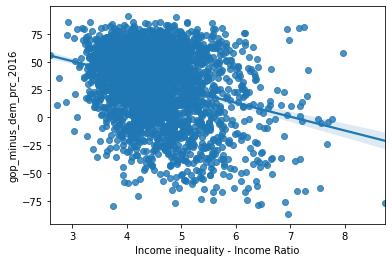

In [42]:
# An easy first step is to look at scatterplots and linear best fit lines using Seaborn

x = 'Income inequality - Income Ratio'
y = 'gop_minus_dem_prc_2016'
seaborn.regplot(x,y,data=df)

### Correlations with scipy.stats

In [43]:
# A good follow up is to run a simple correlation using scipy.stats

stats.pearsonr(df[x],df[y])

ValueError: array must not contain infs or NaNs

### Handling NaN (missing) values for correlation analysis

In [44]:
# Unfortunately, this kind of error is common.  You must be quite specific about how you handle missing values!

# One easy way to handle this is to create a second (temporary) dataframe, and then use pandas to drop missing values.
# You don't necessarily want to drop ANY row in the main dataset that's missing a value, just for this bit of analysis.

x = 'Income inequality - Income Ratio'
y = 'gop_minus_dem_prc_2016'

_df = df.loc[:,[x,y]]
_df = _df.dropna(how='any')
r, p = stats.pearsonr(_df[x],_df[y])
print('r:',r,'p:',p)

r: -0.2854023346732565 p: 2.089589603568985e-59


#### Running Regressions with Statsmodels

In [45]:
# The Patsy formula language can be a little sensitive to spaces in filenames, so we'll again build a 
# temporary dataframe like so:
x = 'Income inequality - Income Ratio'
y = 'gop_minus_dem_prc_2016'
_df = pd.DataFrame()
_df['x'] = df.loc[:,x]
_df['y'] = df.loc[:,y]
_df = _df.dropna(how='any')
_df.head()

# Then run the regression
results = smf.ols(formula='y ~ x',data=_df).fit()

# Print the report
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     275.8
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           2.09e-59
Time:                        10:30:12   Log-Likelihood:                -14950.
No. Observations:                3112   AIC:                         2.990e+04
Df Residuals:                    3110   BIC:                         2.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     88.0046      3.432     25.645      0.0

## A second example: Sleep and Motor Vehicle Crashes

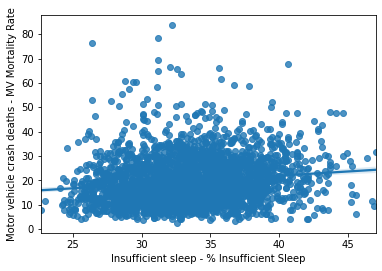

In [38]:
x = 'Insufficient sleep - % Insufficient Sleep'
y = 'Motor vehicle crash deaths - MV Mortality Rate'
seaborn.regplot(x,y,data=df)

In [39]:
x = 'Insufficient sleep - % Insufficient Sleep'
y = 'Motor vehicle crash deaths - MV Mortality Rate'
_df = pd.DataFrame()
_df['x'] = df.loc[:,x]
_df['y'] = df.loc[:,y]
_df = _df.dropna(how='any')

# Then run the regression
results = smf.ols(formula='y ~ x',data=_df).fit()

# Print the report
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     55.78
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           1.08e-13
Time:                        10:24:50   Log-Likelihood:                -10025.
No. Observations:                2730   AIC:                         2.005e+04
Df Residuals:                    2728   BIC:                         2.007e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1457      1.561      5.219      0.0

# Multiple Regression

Often times, we want to run an analysis using more than one explanatory (independent) variable, 
as we know that the effects can have multiple, interrelated causes.

Election preferences, for example, are related to a large number of underlying variables.

In [50]:
x0 = 'Demographics - % Rural'
x1 = 'Demographics - % 65 and over'
x2 = 'Some college - % Some College'

y = 'gop_minus_dem_prc_2016'


_df = pd.DataFrame()
_df['x0'] = df.loc[:,x0]
_df['x1'] = df.loc[:,x1]
_df['x2'] = df.loc[:,x2]
_df['y'] = df.loc[:,y]
_df = _df.dropna(how='any')

# Then run the regression
results = smf.ols(formula='y ~ x0 + x1 + x2',data=_df).fit()

# Print the report
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     338.2
Date:                Wed, 22 Apr 2020   Prob (F-statistic):          4.77e-190
Time:                        10:36:20   Log-Likelihood:                -14642.
No. Observations:                3112   AIC:                         2.929e+04
Df Residuals:                    3108   BIC:                         2.932e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6566      3.272      2.645      0.0

### Moderling Interaction Between Variables

In [51]:
# Then run the regression
results = smf.ols(formula='y ~ x0*x1*x2',data=_df).fit()

# Print the report
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 22 Apr 2020   Prob (F-statistic):          2.83e-213
Time:                        10:50:16   Log-Likelihood:                -14577.
No. Observations:                3112   AIC:                         2.917e+04
Df Residuals:                    3104   BIC:                         2.922e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3702     19.097      1.904      0.0

In [53]:
# Then run the regression
results = smf.ols(formula='y ~ x0 + x1 + x2 + x0:x2 + x1:x2',data=_df).fit()

# Print the report
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     231.1
Date:                Wed, 22 Apr 2020   Prob (F-statistic):          3.32e-210
Time:                        10:55:15   Log-Likelihood:                -14590.
No. Observations:                3112   AIC:                         2.919e+04
Df Residuals:                    3106   BIC:                         2.923e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.9629      9.630      6.019      0.0